In [157]:
import pandas as pd
import numpy as np
import statistics as st
import sklearn
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn import preprocessing
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import pylab
import re
%matplotlib inline 

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

#参考（https://www.kaggle.com/dashaaa/titanic-solutions-python）

In [87]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [88]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [89]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Explore the datas

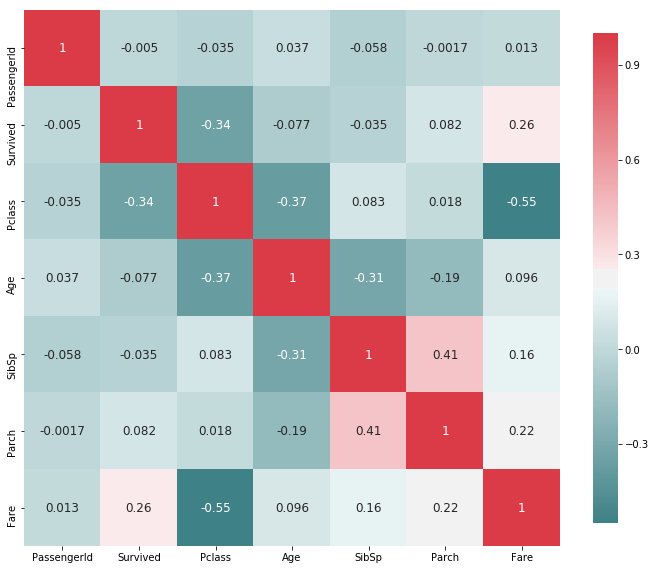

In [91]:
def plot_correlation_map(df):
    corr = df.corr()
    _, ax = plt.subplots(figsize=(12, 10))
    cmap = sns.diverging_palette(200, 10, as_cmap=True)
    _ = sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink': .9},
        ax=ax,
        annot=True,
        annot_kws={'fontsize': 12}
    )
    
plot_correlation_map(train)

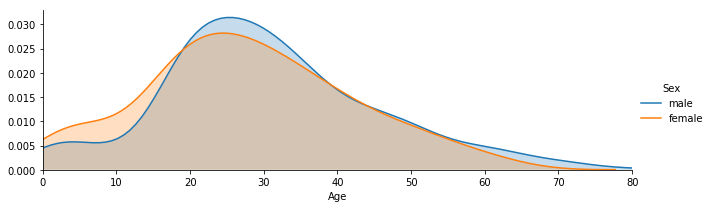

In [92]:
# FacetGridを使うと、複数のカーネル密度推定のグラフを1つのプロットに描くことができる。

# 性別で層別化して、グラフを少し横長に設定する。
fig = sns.FacetGrid(train, hue="Sex",aspect=3)

# mapを使って、性別ごとにkdeplotを描くようにする。
fig.map(sns.kdeplot,'Age',shade= True)

# xの最大値を長老に合わせる。
oldest = train['Age'].max()

# x軸の範囲を設定する。
fig.set(xlim=(0,oldest))

# 凡例を付け加える。
fig.add_legend()

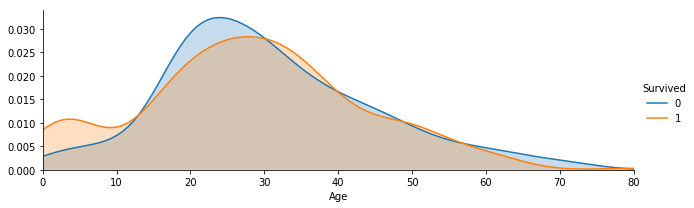

In [93]:
# 生死で層別化する。
fig = sns.FacetGrid(train, hue="Survived",aspect=3)

# mapを使って、性別ごとにkdeplotを描くようにする。
fig.map(sns.kdeplot,'Age',shade= True)

# xの最大値を長老に合わせる。
oldest = train['Age'].max()

# x軸の範囲を設定する。
fig.set(xlim=(0,oldest))

# 凡例を付け加える。
fig.add_legend()

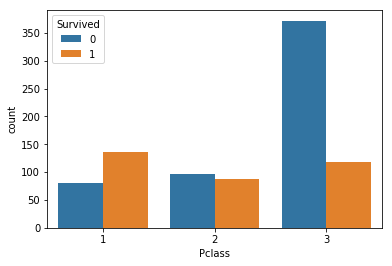

In [94]:
pl_class = sns.countplot('Pclass', data=train, hue='Survived')

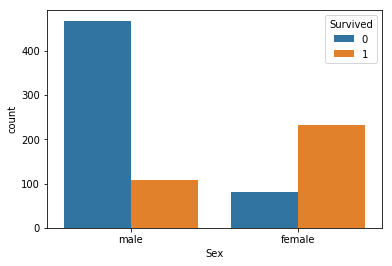

In [95]:
pl_class = sns.countplot('Sex', data=train, hue='Survived')

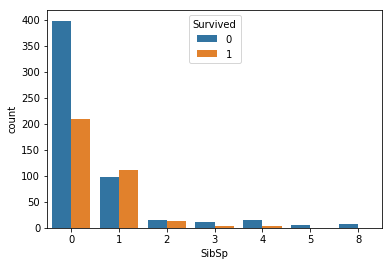

In [96]:
pl_class = sns.countplot('SibSp', data=train, hue='Survived')

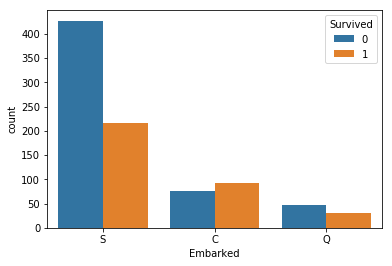

In [97]:
pl_embarked = sns.countplot('Embarked', data=train, hue='Survived')

# Mappingしていくゾォォォ

In [98]:
train['Embarked'].isnull().sum()

2

## two blank guys are possibly S due to hight rate death

In [99]:
train['Embarked'].fillna('S', inplace=True)

In [100]:
train['Embarked'].isnull().sum()

0

In [101]:
train['Fare'].sum()

28693.9493

In [102]:
train['Fare'].isnull().sum()

0

In [103]:
#Sex mapping 
train['Sex'] = train['Sex'].map({"male":0, "female":1})
test['Sex'] = test['Sex'].map({"male":0, "female":1})

In [104]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [105]:
#groupby(['Pclass']をすることによって、PclassごとのSurvivedの平均が見れる
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [106]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()


,Sex,Survived
0,0,0.188908
1,1,0.742038


In [107]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()


,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [108]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


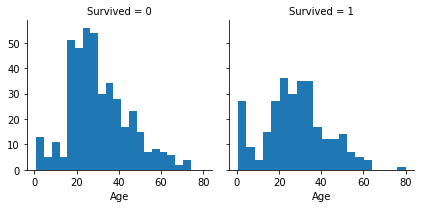

In [109]:
#Analyze by visualizing data with FacetGrid
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [110]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [111]:
# Drop the ticket data just in case since it seems irrelevant.
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [112]:
# Drop the cabin data because it has a bunch of null datas
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [113]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


# When it comes to Name, only sex  influences ?

In [114]:
#大まかにMrsで分類してみる。適当にMrsでも格納しておく。
train['Title'] = 'Mrs'
test['Title'] = 'Mrs'

In [115]:
#group() 正規表現にマッチした文字列を返す。group()がマッチした文字列の取得。\.はカンマまでという意味
for i in range(len(train['Name'])):
    train['Title'].values[i-1]= re.search('([A-Za-z]+)\.', train['Name'].values[i-1]).group()
for i in range(len(test['Name'])):
    test['Title'].values[i-1]= re.search('([A-Za-z]+)\.', test['Name'].values[i-1]).group()
    
#train['Title'].values[i-1]= re.search('([A-Za-z]+)\.', train['Name'].values[i-1]).group()とは、
#train['Name']を調べ、「英文字A-Za-zから始まり.で終わる」の塊を格納する



In [116]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,Mr.


In [117]:
#crosstab、これめっちゃ使える！！
pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt.,1,0
Col.,2,0
Countess.,0,1
Don.,1,0
Dr.,6,1
Jonkheer.,1,0
Lady.,0,1
Major.,2,0
Master.,40,0


In [118]:
# Muss, Master, Mr, Mrs are outstanding above

#Uncommon tittle should be changed to Rare or put it into common titile
train['Title'] = train['Title'].replace(['Capt.', 'Col.', 'Countess.', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Rev.', 'Sir.'], 'Rare')
train['Title'] = train['Title'].replace('Mlle.', 'Miss.')
train['Title'] = train['Title'].replace('Ms.', 'Miss.')
train['Title'] = train['Title'].replace('Mme.', 'Mrs.')

In [119]:
test['Title'] = test['Title'].replace(['Capt.', 'Col.', 'Countess.', 'Don.', 'Dr.', 'Jonkheer.', 'Lady.', 'Major.', 'Rev.', 'Sir.'], 'Rare')
test['Title'] = test['Title'].replace('Mlle.', 'Miss.')
test['Title'] = test['Title'].replace('Ms.', 'Miss.')
test['Title'] = test['Title'].replace('Mme.', 'Mrs.')

In [120]:
pd.crosstab(train['Title'], train['Survived'])

Survived,0,1
Title,,
Master.,17,23
Miss.,55,130
Mr.,436,81
Mrs.,26,100
Rare,15,8


In [121]:
train[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Master.,0.575000
Miss.,0.702703
Mr.,0.156673
Mrs.,0.793651
Rare,0.347826


In [122]:
#title mapping

title_mapping = {"Mr.": 1, "Miss.": 2, "Mrs.": 3, "Master.": 4, "Rare": 5}
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

#test dataには欠損が一個あったが、1（Mr．）がダントツで多かったので、ここでは１を入れる。
test['Title'] = test['Title'].fillna(1)

In [123]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1


# Age mapping

In [124]:
#クラス、性別別それぞれで中央値をとって、それをnull値に打ち込むための計算

#からの行列を作っておく(2row, 3col)
guess_ages = np.zeros((2,3))

for i in range(0,2):
    for j in range(0,3):
        guess = train[(train['Sex'] == i) & (train['Pclass'] == j+1)]['Age'].dropna()
        
        age_guess = guess.median()
        
        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
        
       

In [125]:
guess_ages

array([[40. , 30. , 25. ],
       [35. , 28. , 21.5]])

In [126]:
#上の計算で出した中央値を、nullに入れる作業

for i in range(0, 2):
        for j in range(0, 3):
            train.loc[ (train.Age.isnull()) & (train.Sex == i) & (train.Pclass == j+1), 'Age'] = guess_ages[i,j]

train['Age'] = train['Age'].astype(int)


In [127]:
#test dataも同様
for i in range(0,2):
    for j in range(0,3):
        guess = test[(test['Sex'] == i) & (test['Pclass'] == j+1)]['Age'].dropna()
        
        age_guess = guess.median()
        
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

#Similarly test data
for i in range(0, 2):
        for j in range(0, 3):
            test.loc[ (test.Age.isnull()) & (test.Sex == i) & (test.Pclass == j+1), 'Age'] = guess_ages[i,j]

test['Age'] = test['Age'].astype(int)
train['Age'] = train['Age'].astype(int)


In [128]:
train.Age.isnull().sum()

0

In [129]:
#Ageをどこで分けるかを考える。
#まず５等分してみる
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [130]:
#８等分してみる
train['AgeBand'] = pd.cut(train['Age'], 8)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(-0.08, 10.0]",0.593750
1,"(10.0, 20.0]",0.379310
2,"(20.0, 30.0]",0.322751
3,"(30.0, 40.0]",0.448649
4,"(40.0, 50.0]",0.392857
5,"(50.0, 60.0]",0.404762
6,"(60.0, 70.0]",0.222222
7,"(70.0, 80.0]",0.250000


In [131]:
#とりあえず今回は5等分で行く
train['AgeBand'] = pd.cut(train['Age'], 5)

train.loc[ train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age']

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [132]:
# Same goes for test data
test.loc[  test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[ test['Age'] > 64, 'Age']

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2,0,0,7.8292,Q,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,7.0000,S,3.0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,9.6875,Q,1.0
3,895,3,"Wirz, Mr. Albert",0,1,0,0,8.6625,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,12.2875,S,3.0


In [133]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize']).mean()

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [134]:
#Check whether alone or not 

train['IsAlone'] = 0
for i in range(len(train['FamilySize'])):
    if train['FamilySize'].values[i-1] == 1:
        train['IsAlone'].values[i-1] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [135]:
#testにも格納
test['IsAlone'] = 0
for i in range(len(test['FamilySize'])):
    if test['FamilySize'].values[i-1] == 1:
        test['IsAlone'].values[i-1] = 1

In [136]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S,1,"(16.0, 32.0]",2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,71.2833,C,3,"(32.0, 48.0]",2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S,2,"(16.0, 32.0]",1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,53.1000,S,3,"(32.0, 48.0]",2,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,8.0500,S,1,"(32.0, 48.0]",1,1


In [137]:
#Age と Pclassの関係の行を作る
train['Age*Class'] = train.Age * train.Pclass
test['Age*Class'] = test.Age * test.Pclass

train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


# Embark

In [138]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [139]:
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

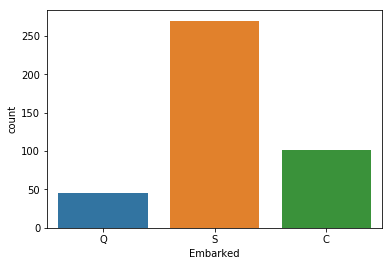

In [140]:
sns.countplot('Embarked', data=test)

In [141]:
# same goes for test
test['Embarked'] = test['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [142]:
#Fareもとりあえず４等分！
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [143]:
train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3
train['Fare'] = train['Fare'].astype(int)

In [144]:
#test dataには欠損があるので、中央値を入れておく。
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3
test['Fare'] = test['Fare'].astype(int)

In [145]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
FamilySize     0
IsAlone        0
Age*Class      0
dtype: int64

# Train and prediction

### Need to drop useless datas

In [146]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FamilySize,IsAlone,Age*Class,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,0,0,1,"(16.0, 32.0]",2,0,3,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,3,1,3,"(32.0, 48.0]",2,0,2,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,1,0,2,"(16.0, 32.0]",1,1,3,"(7.91, 14.454]"


In [147]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,"Kelly, Mr. James",0,2,0,0,0,2,1.0,1,1,6
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,0,0,3.0,2,0,6
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,1,2,1.0,1,1,6


In [148]:
train = train.drop(["AgeBand","FareBand",'Parch', 'SibSp', 'FamilySize', "Name"] ,axis=1)

In [149]:
test = test.drop(['Parch', 'SibSp', 'FamilySize', "Name"] ,axis=1)

In [150]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0,3,0,1,0,0,1,0,3
1,2,1,1,1,2,3,1,3,0,2
2,3,1,3,1,1,1,0,2,1,3
3,4,1,1,1,2,3,0,3,0,2
4,5,0,3,0,2,1,0,1,1,6


In [151]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1.0,1,6
1,893,3,1,2,0,0,3.0,0,6
2,894,2,0,3,1,2,1.0,1,6
3,895,3,0,1,1,0,1.0,1,3
4,896,3,1,1,1,0,3.0,0,3


In [152]:
X_train = train.drop(["Survived", "PassengerId"], axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [156]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
#X_trainというSurvivedを落としたデータと、Y_trainというSurvivedのデータ、元々は同じデータだったもので、採点をする。→fitの精度がわかる！
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

In [154]:
#Look up corelation 

coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Pclass,2.201527
5,Embarked,0.398234
2,Sex,0.287162
4,Fare,0.261762
6,Title,0.129140
3,Age,-0.085150
7,IsAlone,-0.311202
0,Survived,-0.749007
8,Age*Class,NaN


In [158]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.84

In [159]:
#knn

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2) #最後の２は多分小数点の話
acc_knn


84.74

In [160]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

In [161]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.0

In [162]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.12

In [163]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


73.06

In [164]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

In [165]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

In [166]:
machine_models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
machine_models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.00
6,Stochastic Gradient Decent,73.06
4,Naive Bayes,72.28


In [167]:
#submission!!!
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv('submission.csv', index=False)